## Web Scraping FPTs
Mục đích:
1. Scraping web để trích xuất một số thông tin như Nhãn hiệu, giá, bình luận
2. EDA để xem qua một số nội dung business
3. Visualization

### Các giá trị cần Craping
1. Nhãn hiệu, 2. Tên sản phẩm, 3. Giá sản phẩm, 4. Bình luận

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import time

In [4]:
url = 'https://fptshop.com.vn/dien-thoai?sort=gia-cao-den-thap&trang=1'
re = requests.get(url)
bs = BeautifulSoup(re.content, 'html.parser')
titles = []
prices = []
previews = []
for title in bs.find_all('div', class_='fs-lpil'):
    i1 = title.a.get('title')
    titles.append(i1)
    
for price in  bs.find_all('div', class_='fs-lpil-price'):
    i2 = price.p.text
    prices.append(i2)
    
for preview in  bs.find_all('div', class_='fs-dttrate'):
    i3 = preview.p.text
    previews.append(i3)
time.sleep(3)

In [5]:
print(len(titles), len(prices), len(previews))

20 20 20


In [6]:
thong_so = bs.find_all('div', class_='fs-lpil-tsul')

ji = []
for i in thong_so:
    for li in i.findAll('li'):
        
        ji.append(li.text if i.text is not None else 1)
        
df = pd.DataFrame({'f': ji})

In [7]:
df_ = df['f'].str.split(':', expand=True)
df_.columns = ['Thong_so', 'Thuoc_do']
df_['Thong_so'] = df_['Thong_so'].str.strip()
df_.head()

,Thong_so,Thuoc_do
0,Màn hình,1242 x 2688 Pixels 6.5 inchs
1,Camera,Dual Camera 12.0 MP 7.0 MP
2,Pin,"Lâu hơn iPhone X 1,5h"
3,RAM,4 GB
4,CPU,Apple A12 Bionic


In [8]:
df_man_hinh = df_[df_['Thong_so'] =='Màn hình']['Thuoc_do'].tolist()
df_camera = df_[df_['Thong_so'] =='Camera']['Thuoc_do'].tolist()
df_pin = df_[df_['Thong_so'] =='Pin']['Thuoc_do'].tolist()
df_ram = df_[df_['Thong_so'] =='RAM']['Thuoc_do'].tolist()
df_cpu = df_[df_['Thong_so'] =='CPU']['Thuoc_do'].tolist()

In [9]:
print(len(df_man_hinh), len(df_camera), len(df_pin), len(df_ram), len(df_cpu))

20 20 20 20 20


In [10]:
df_c1 = pd.DataFrame({'Ten_ĐT': titles, 'Gia_ĐT': prices, 'Danh_Gia': previews}).drop(index=[15,19]).reset_index().iloc[:,1:]

df_c2 = pd.DataFrame({'Man_hinh': df_man_hinh, 'Camera': df_camera, 'Pin': df_pin,
                      'RAM': df_ram, 'CPU': df_cpu})

df_cc = pd.concat([df_c1, df_c2], axis=1)
df_cc.tail()

,Ten_ĐT,Gia_ĐT,Danh_Gia,Man_hinh,Camera,Pin,RAM,CPU
15,Samsung Galaxy S9,19.990.000 ₫,(78 đánh giá),828 x 1792 Pixels 6.1 inchs,12.0 MP 7.0 MP,"Lâu hơn iPhone 8 Plus 1,5h",3 GB,Apple A12 Bionic
16,Samsung Galaxy S9+,19.990.000 ₫,(80 đánh giá),"2K (1440 x 2960 Pixels) 5.8""",12 MP 8 MP,3000 mAh,4 GB,Exynos 9810 8 nhân 64 bit
17,Samsung Galaxy S9 Plus Red 64GB,19.990.000 ₫,(74 đánh giá),"2K (1440 x 2960 Pixels) 6.2""",2 camera 12 MP 8 MP,3500 mAh,6 GB,Exynos 9810 8 nhân 64 bit
18,NaN,NaN,NaN,2K (1440 x 2960 Pixels) 6.2 inches,2 camera 12 MP 8.0 MP,3500 mAh,6 GB,Exynos 9810 8 nhân 64 bit
19,NaN,NaN,NaN,828 x 1792 Pixels 6.1 inchs,12.0 MP 7.0 MP,"Lâu hơn iPhone 8 Plus 1,5h",3 GB,Apple A12 Bionic


In [11]:
df_cc['Gia_ĐT'] = df_cc['Gia_ĐT'].str.strip('₫')
df_cc['Gia_ĐT'] = df_cc['Gia_ĐT'].str.replace('.',"")

df_cc['Danh_Gia'] = df_cc['Danh_Gia'].str.strip(')')
df_cc['Danh_Gia'] = df_cc['Danh_Gia'].str.strip('(')
df_cc['Danh_Gia'] = df_cc['Danh_Gia'].str.strip('đánh giá')

df_cc['RAM'] = df_cc['RAM'].str.strip('GB')

#### Mình xuất sang excel để xử lý data cho dễ, sau đó import lại để phân tích

In [100]:
#df_cc.to_excel(r"C:\Users\HIEN\Desktop\page8.xlsx")

## import data

In [71]:
df_ana = pd.read_excel(r"C:\Users\HIEN\Desktop\New Microsoft Excel Worksheet.xlsx", dtype={'Gia_ĐT': int, 'Danh_Gia': int})
df_ana['Gia_ĐT'] = df_ana['Gia_ĐT'] / 1000000
df_ana.head(2)

,STT,Category,Ten_ĐT,Gia_ĐT,Danh_Gia,Man_hinh,Camera,Pin_,Pin,RAM_,RAM,CPU
0,28,iPhone,iPhone 7 32GB,12.99,401,1334 x 750 pixels,12.0 MP,1960.0,7.45 Wh (1960 mAh),2,2,Apple A10
1,27,iPhone,iPhone 7 Plus 32GB,13.99,383,1920 x 1080 pixels,Dual 12.0 MP 7.0 MP,2900.0,11.1 Wh (2900 mAh),3,3,A10


In [37]:
df_ana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 12 columns):
STT         154 non-null int64
Category    154 non-null object
Ten_ĐT      154 non-null object
Gia_ĐT      154 non-null float64
Danh_Gia    154 non-null int32
Man_hinh    152 non-null object
Camera      152 non-null object
Pin_        144 non-null object
Pin         153 non-null object
RAM_        143 non-null object
RAM         153 non-null object
CPU         149 non-null object
dtypes: float64(1), int32(1), int64(1), object(9)
memory usage: 13.9+ KB


#### Các giá trị null là do điện thoại không đủ chức năng, ví dụ như điện thoại không Ram

Text(0.5, 0, 'Units - cái')

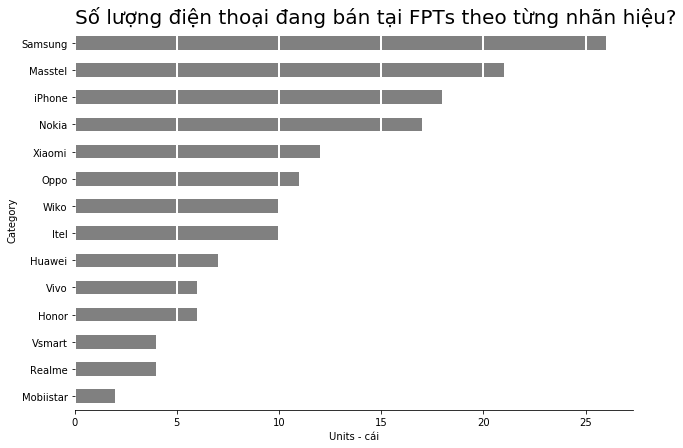

In [41]:
ax = plt.gca()
df_ana.groupby('Category')['Ten_ĐT'].count().sort_values().plot.barh(color='grey', figsize=(10,7))
sns.despine(); plt.grid(axis='x', color='white', lw=2); ax.set_axisbelow(False)
plt.title('Số lượng điện thoại đang bán tại FPTs theo từng nhãn hiệu?', fontsize=20, loc='left')
plt.xlabel('Units - cái')

Text(0.5, 0, 'Giá trung bình - triệu đồng')

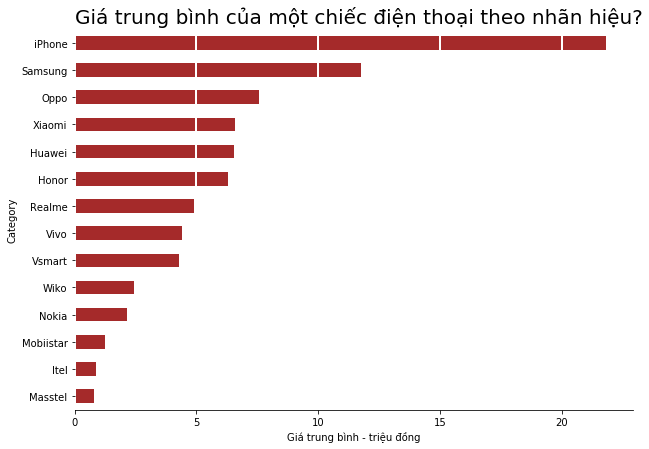

In [46]:
plt.figure()
ax = plt.gca()
df_ana.groupby('Category')['Gia_ĐT'].mean().sort_values().plot.barh(color='brown', figsize=(10,7))
sns.despine(); plt.grid(axis='x', color='white', lw=2); ax.set_axisbelow(False)
plt.title('Giá trung bình của một chiếc điện thoại theo nhãn hiệu?', fontsize=20, loc='left')
plt.xlabel('Giá trung bình - triệu đồng')

Text(0.5, 0, 'Lượt đánh giá - lần')

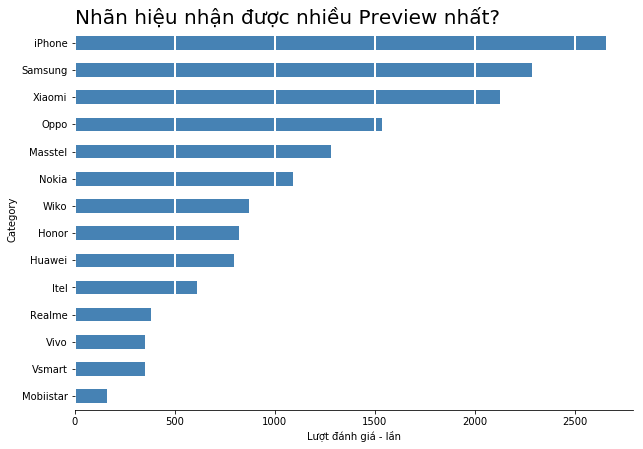

In [54]:
ax = plt.gca()
df_ana.groupby('Category')['Danh_Gia'].sum().sort_values().plot.barh(color='steelblue', figsize=(10,7))
sns.despine(); plt.grid(axis='x', color='white', lw=2); ax.set_axisbelow(False)
plt.title('Nhãn hiệu nhận được nhiều Preview nhất?', fontsize=20, loc='left')
plt.xlabel('Lượt đánh giá - lần')

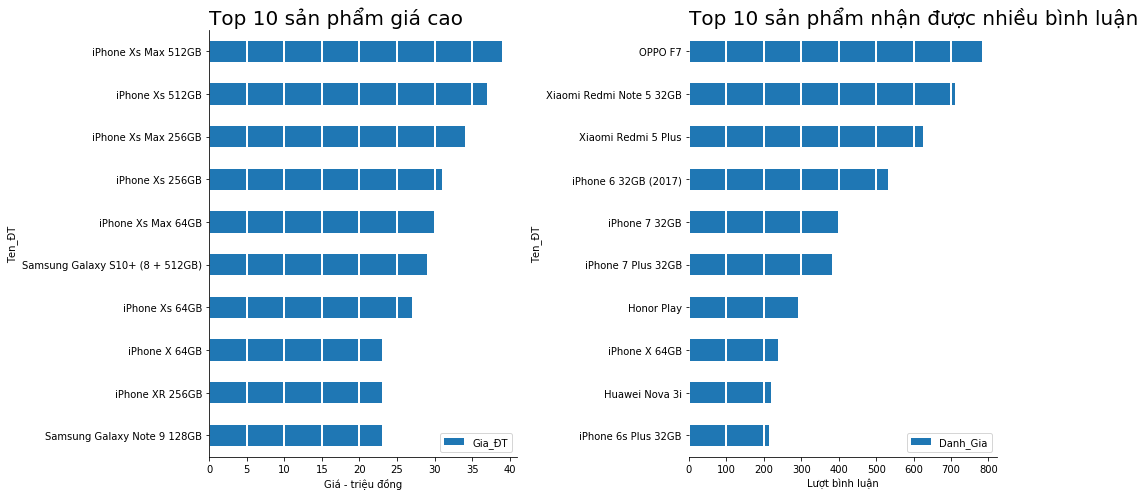

In [122]:
fig,ax = plt.subplots(1,2, figsize=(15,7))
axx = plt.gca()

df_ana[['Ten_ĐT', 'Gia_ĐT']].sort_values('Gia_ĐT').set_index('Ten_ĐT')[-10:].plot.barh(ax=ax[0])
ax[0].set_title('Top 10 sản phẩm giá cao', fontsize=20, loc='left')
ax[0].grid(axis='x', color='white', lw=2), axx.set_axisbelow(False); ax[0].set_xlabel('Giá - triệu đồng')

df_ana[['Ten_ĐT', 'Danh_Gia']].sort_values('Danh_Gia').set_index('Ten_ĐT')[-10:].plot.barh(ax=ax[1])
ax[1].set_title('Top 10 sản phẩm nhận được nhiều bình luận', fontsize=20, loc='left');ax[1].set_xlabel('Lượt bình luận')
sns.despine(); plt.grid(axis='x', color='white', lw=2), axx.set_axisbelow(False)
plt.tight_layout()

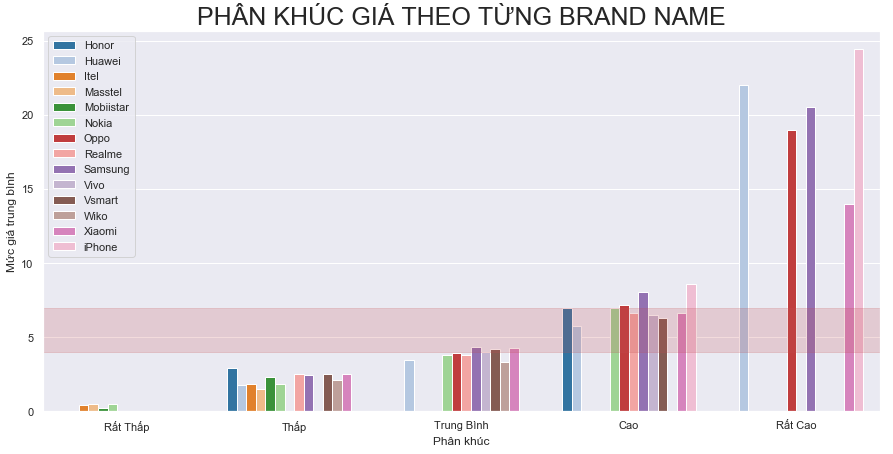

In [226]:
df_ana['q_cut'] = pd.qcut(df_ana['Gia_ĐT'],5, precision=0, labels=['Rất Thấp','Thấp', 'Trung Bình', 'Cao', 'Rất Cao'])
df_f = df_ana.groupby(['Category', 'q_cut'])['Gia_ĐT'].mean().reset_index()

sns.set()
figs, axs = plt.subplots(figsize=(15,7))
sns.barplot(y='Gia_ĐT', x='q_cut',data=df_f, hue='Category', palette=sns.color_palette("tab20", n_colors=14), ax=axs)
plt.legend(loc='upper left')
plt.title('PHÂN KHÚC GIÁ THEO TỪNG BRAND NAME', fontsize=25)
plt.xlabel('Phân khúc') ; plt.ylabel('Mức giá trung bình')
plt.axhspan(ymin=4, ymax=7, alpha=0.2, color='r')

### Đến đây mình có thể thấy:
1. iPhone chỉ cạnh tranh ở phân khúc giá cao
2. Samsung, Oppo, Huawei, Xiaomi đánh đa phân khúc
3. Nokia chọn phân khúc < 8trđ
4. Itel, Masstel cạnh tranh ở phân khúc giá thấp

Text(0, 0.5, 'Lượng SKUs')

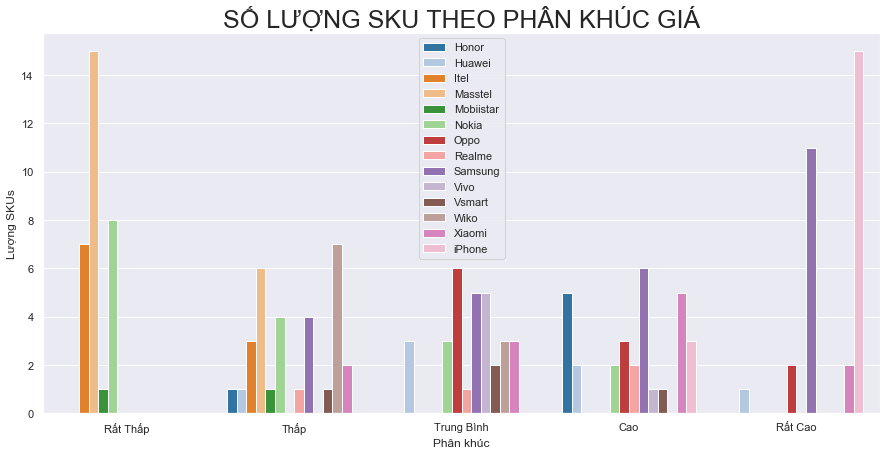

In [204]:
df_ana['q_cut'] = pd.qcut(df_ana['Gia_ĐT'],5, precision=0, labels=['Rất Thấp','Thấp', 'Trung Bình', 'Cao', 'Rất Cao'])
df_f = df_ana.groupby(['Category', 'q_cut'])['Ten_ĐT'].count().reset_index()

sns.set()
figs, axs = plt.subplots(figsize=(15,7))
sns.barplot(y='Ten_ĐT', x='q_cut',data=df_f, hue='Category', palette=sns.color_palette("tab20", n_colors=14), ax=axs)
plt.legend(loc='best')
plt.title('SỐ LƯỢNG SKU THEO PHÂN KHÚC GIÁ', fontsize=25)
plt.xlabel('Phân khúc') ; plt.ylabel('Lượng SKUs')


### Bức tranh đã rõ ràng hơn
1. Oppo trội ở phân khúc Trung bình
2. Nokia chọn phân khúc giá dưới 5tr là chủ yếu